In [1]:
# importing libraries
import re #re to apply regular expression
import numpy as np #For mathematical Operations
import pandas as pd #Pandas to work with DataFrames
import string #For Performing String Operations(For Punctuations)
from collections import Counter #For bigrams
import random


#For Natural Language Operations
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt #For Creating Plots
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS #For creating Wordclouds

[nltk_data] Downloading package punkt to C:\Users\PAWAN
[nltk_data]     PALIWAL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PAWAN PALIWAL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
#Reading data from the book text file
book = open("gullivers-travels.txt","r",encoding='utf-8', errors='ignore')
word_list = book.read().splitlines()
#Determining no. of words and characters in book
print(f"No. of Words: {len(word_tokenize(' '.join(word_list)))}")
print(f"No. of Characters: {len(' '.join(word_tokenize(' '.join(word_list))))}")

#Adding Space at end of the string so that when it is merged
word_list = [i+" " for i in word_list if i!='']
print(f"No. of Lines: {len(word_list)}")

print("\nPrinting only first 100 lines\n")
word_list[:100]

No. of Words: 122457
No. of Characters: 604126
No. of Lines: 10548

Printing only first 100 lines



['Gullivers Travels ',
 'By Jonathan Swift ',
 'Download free eBooks of classic literature, books and ',
 'novels at Planet eBook. Subscribe to our free eBooks blog ',
 'and email newsletter. ',
 'THE PUBLISHER TO ',
 'THE READER. ',
 '  As given in the original edition. ',
 'The author of these Travels, Mr. Lemuel Gulliver, is my an- ',
 'cient and intimate friend; there is likewise some relation ',
 'between us on the mothers side. About three years ago, Mr. ',
 'Gulliver growing weary of the concourse of curious people ',
 'coming to him at his house in Redriff, made a small pur- ',
 'chase of land, with a convenient house, near Newark, in ',
 'Nottinghamshire, his native country; where he now lives ',
 'retired, yet in good esteem among his neighbours. ',
 '   Although Mr. Gulliver was born in Nottinghamshire, ',
 'where his father dwelt, yet I have heard him say his family ',
 'came from Oxfordshire; to confirm which, I have observed ',
 'in the churchyard at Banbury in that count

In [3]:
word_list = word_list[214:-17]


In [4]:
#Removing Running Chapter Names from Text and other not important word
for i in word_list:
     if re.search(r"^[Cc]hapter\s[IXV]+|[0-9]+(\s)+Gullivers Travels|^[A-Z\s.]+$|^Free eBooks at Planet eBook.com(\s)*[0-9]+",i) != None:
         word_list.remove(i)


#Converting List to the text by joining them
word_txt = ""
word_txt = word_txt.join(word_list)
word_txt[:300]

'TO LILLIPUT. The author gives some account of himself and family. His first inducements to travel. He is shipwrecked, and swims for his life. Gets safe on shore in the country of Lilliput; is made a prisoner, and carried up the country. My father had a small estate in Nottinghamshire: I was        t'

In [5]:
#Converting Data to Lower Case and then cleaning it
clean_txt = word_txt.lower()
clean_txt = re.sub("(\n)|(\s)+"," ",clean_txt)   # Removing new line character and multiple spaces

clean_txt = re.sub('[^(a-zA-Z)\s]', ' ', clean_txt)
my_punct = string.punctuation
punct_pattern = re.compile("[" + re.escape("".join(my_punct)) + "]")
clean_txt = re.sub(punct_pattern, " ", clean_txt)                       # Removing all punctuation marks
clean_txt = re.sub("(\s)*[0-9]+(\s)+"," ",clean_txt)                    # Removing all the numbers
clean_txt = re.sub("(\s)[a-z](\s)"," ",clean_txt)                       # Removing single alphabetic characters
clean_txt = re.sub("(\s)+"," ",clean_txt)
clean_txt[:400]

'to lilliput the author gives some account of himself and family his first inducements to travel he is shipwrecked and swims for his life gets safe on shore in the country of lilliput is made prisoner and carried up the country my father had small estate in nottinghamshire was the third of five sons he sent me to emanuel college in cambridge at fourteen years old where resided three years and appli'

In [6]:
#Tokenizing the Text
tokens = word_tokenize(clean_txt)
tokens_with_stopword= tokens;

In [7]:
#Determining the frequency of Tokens
dic = {}
for i in tokens:
    if i not in dic.keys():
        dic[i] = 1
    else:
        dic[i] += 1

In [8]:
#Forming DataFrame contaning the Tokens, their count and their length
df = pd.DataFrame(list(dic.items()))
df.rename(columns = {0:'Tokens', 1:'Frequency'}, inplace = True)
df["Length_Tokens"] = [len(i) for i in df['Tokens']]
#Sorting DataFrame in order of the Length
df = df.sort_values('Frequency',ascending = False)
df

,Tokens,Frequency,Length_Tokens
2,the,5774,3
7,of,3733,2
9,and,3587,3
0,to,3350,2
25,in,1979,2
...,...,...,...
6026,zenith,1,6
6027,garments,1,8
2541,instrumental,1,12
6031,harps,1,5


In [9]:
#Determining the frequency based on Word length
len_df = df.groupby(['Length_Tokens'],as_index=False).sum()
len_df

C:\Users\PAWAN PALIWAL\AppData\Local\Temp\ipykernel_19228\3355945146.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  len_df = df.groupby(['Length_Tokens'],as_index=False).sum()


,Length_Tokens,Frequency
0,1,6
1,2,20157
2,3,21339
3,4,17797
4,5,12689
5,6,8289
6,7,7636
7,8,4453
8,9,2917
9,10,1776


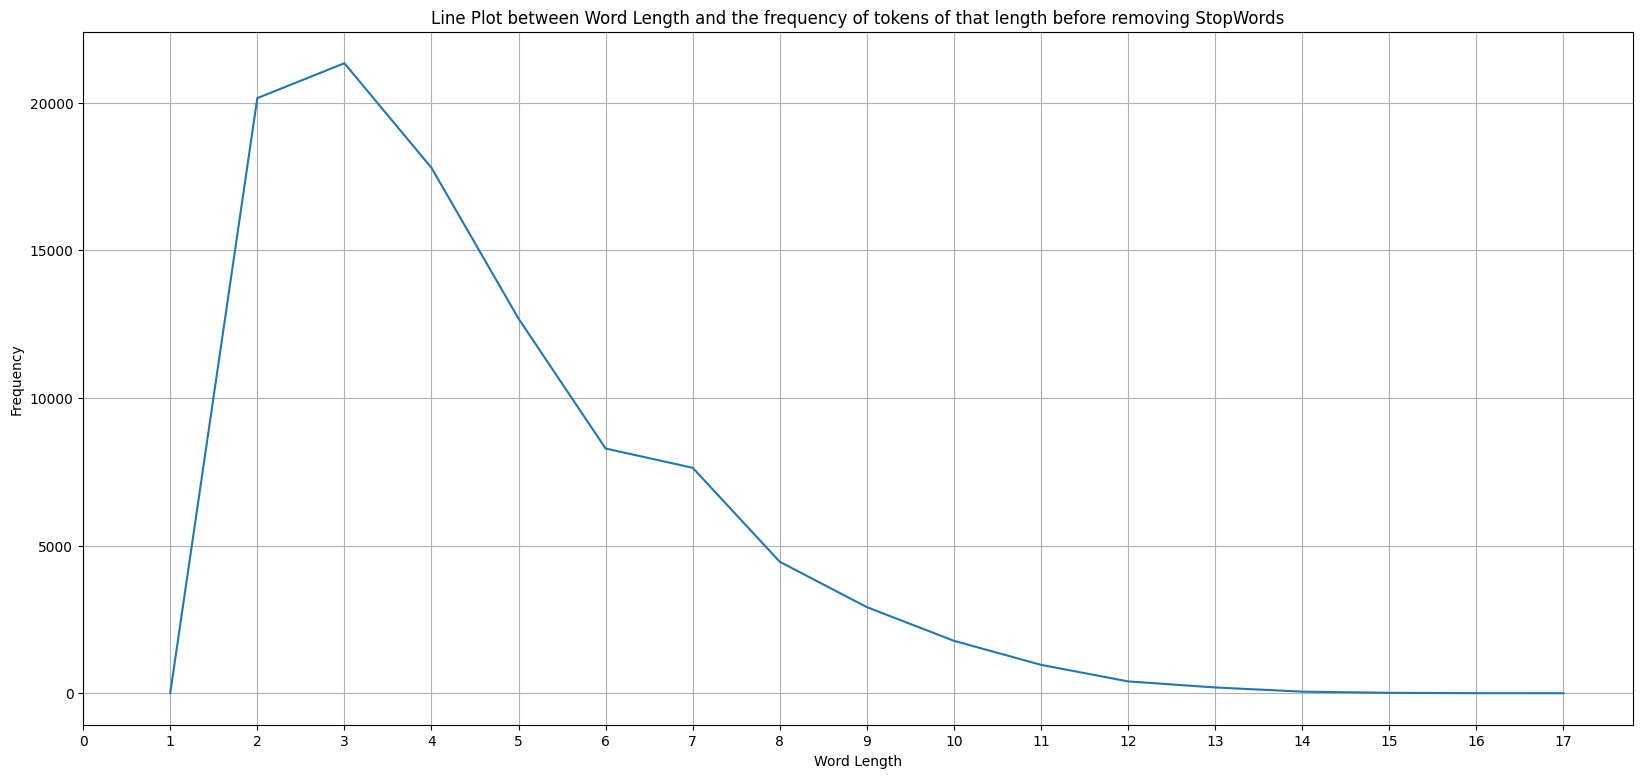

In [10]:
#Plot between Word Length and the frequency of tokens of that length before removing StopWords
plt.figure(figsize=(20,9))
plt.title("Line Plot between Word Length and the frequency of tokens of that length before removing StopWords")
plt.plot(len_df['Length_Tokens'],len_df["Frequency"])
plt.xticks(np.linspace(0,17,18))
plt.xlabel("Word Length")
plt.ylabel("Frequency")
plt.grid()
plt.show()

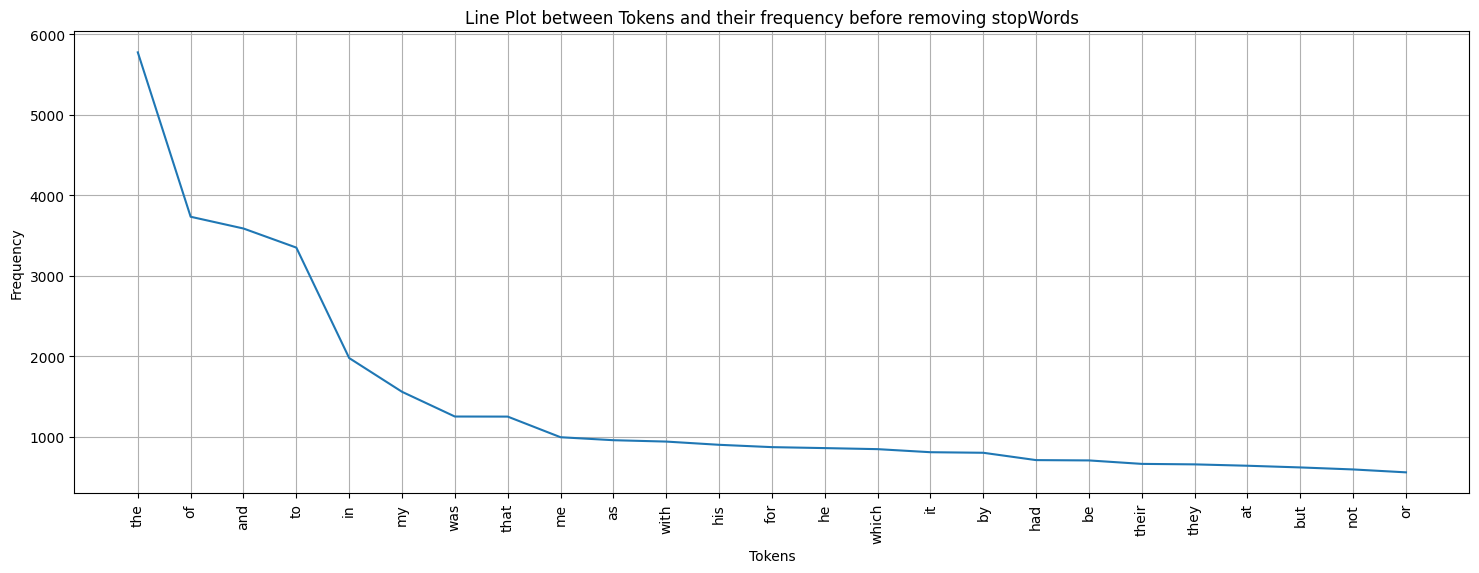

In [11]:
#Plot between Tokens and their frequency before removing stopWords
plt.figure(figsize=(18,6))
plt.title("Line Plot between Tokens and their frequency before removing stopWords")
plt.plot(df['Tokens'].iloc[:25],df['Frequency'].iloc[:25])
plt.xticks(rotation=90)
plt.xlabel("Tokens")
plt.ylabel("Frequency")
plt.grid()
plt.show()

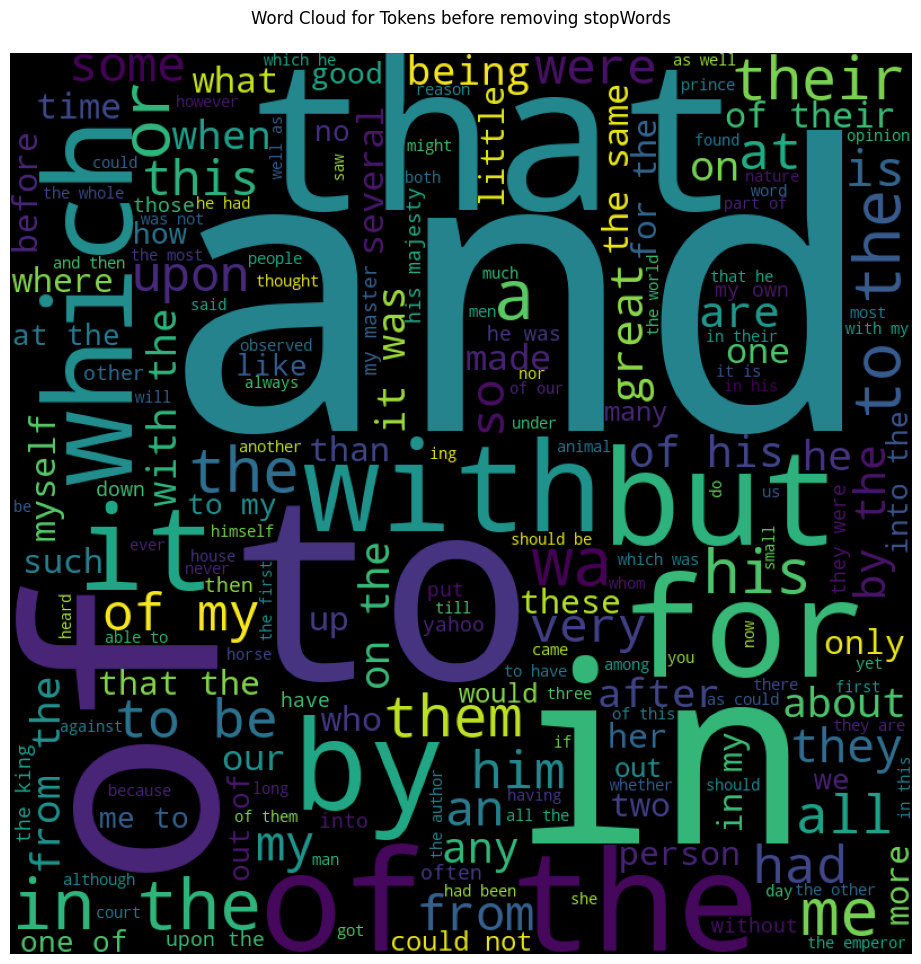

In [12]:
#Creating WordCloud before Removing StopWords
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black', stopwords={},
                min_font_size = 5).generate(clean_txt)

plt.figure(figsize = (10, 10), facecolor = None)
plt.title("Word Cloud for Tokens before removing stopWords\n")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 2)
plt.show()

In [13]:
#Removing StopWords
tokens = [w for w in tokens if w not in STOPWORDS]
stop_words_removed_txt = " ".join(tokens)

In [14]:
tok_len = [len(i) for i in tokens]
dic = dict(nltk.FreqDist(tok_len))
len_df_a = pd.DataFrame(list(dic.items()))
len_df_a.rename(columns = {0:'Length_Tokens', 1:'Frequency'}, inplace = True)
len_df_a = len_df_a.sort_values('Length_Tokens')
len_df_a

,Length_Tokens,Frequency
15,1,4
9,2,571
8,3,3764
5,4,9346
2,5,8423
1,6,7684
3,7,7141
0,8,4451
7,9,2837
10,10,1735


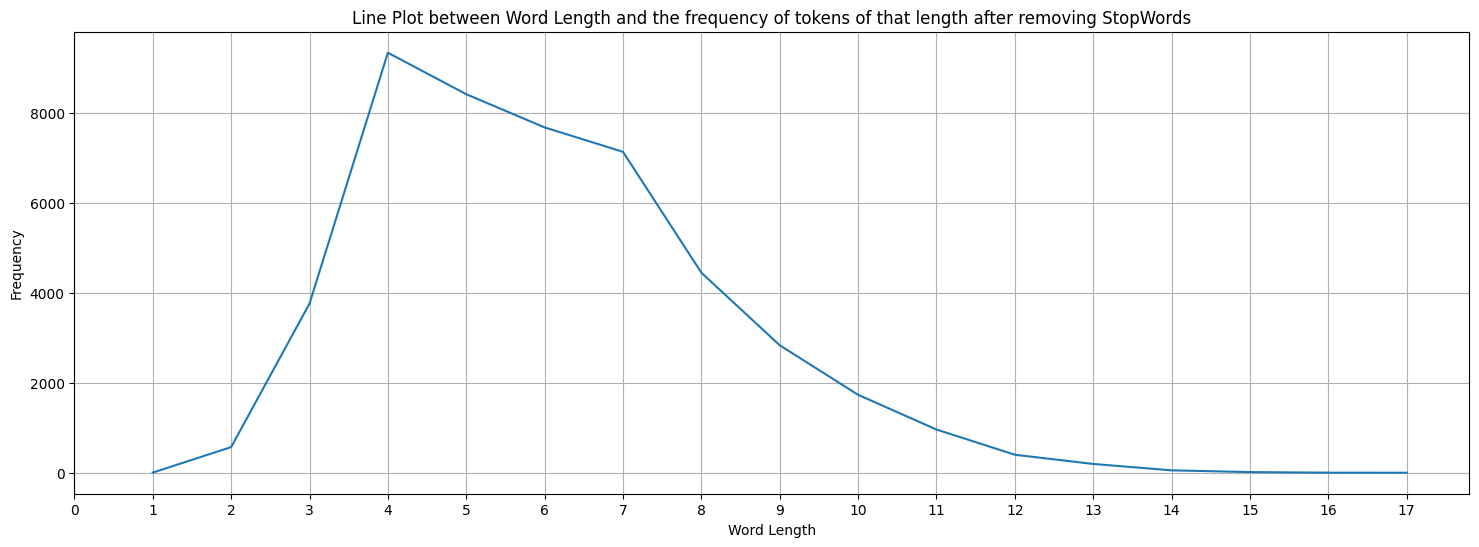

In [15]:
#Plot between Word Length and the frequency of tokens of that length after removing StopWords
plt.figure(figsize=(18,6))
plt.title("Line Plot between Word Length and the frequency of tokens of that length after removing StopWords")
plt.plot(len_df_a['Length_Tokens'],len_df_a['Frequency'])
plt.xticks(np.linspace(0,17,18))
plt.xlabel("Word Length")
plt.ylabel("Frequency")
plt.grid()
plt.show()

In [16]:
dic_a = dict(nltk.FreqDist(tokens))
df_a = pd.DataFrame(list(dic_a.items()))
df_a.rename(columns = {0:'Tokens', 1:'Frequency'}, inplace = True)
df_a = df_a.sort_values('Frequency',ascending=False)
df_a

,Tokens,Frequency
266,upon,384
42,great,287
270,one,277
87,two,253
15,made,223
...,...,...
5326,eluding,1
5328,insti,1
5329,tution,1
5330,erased,1


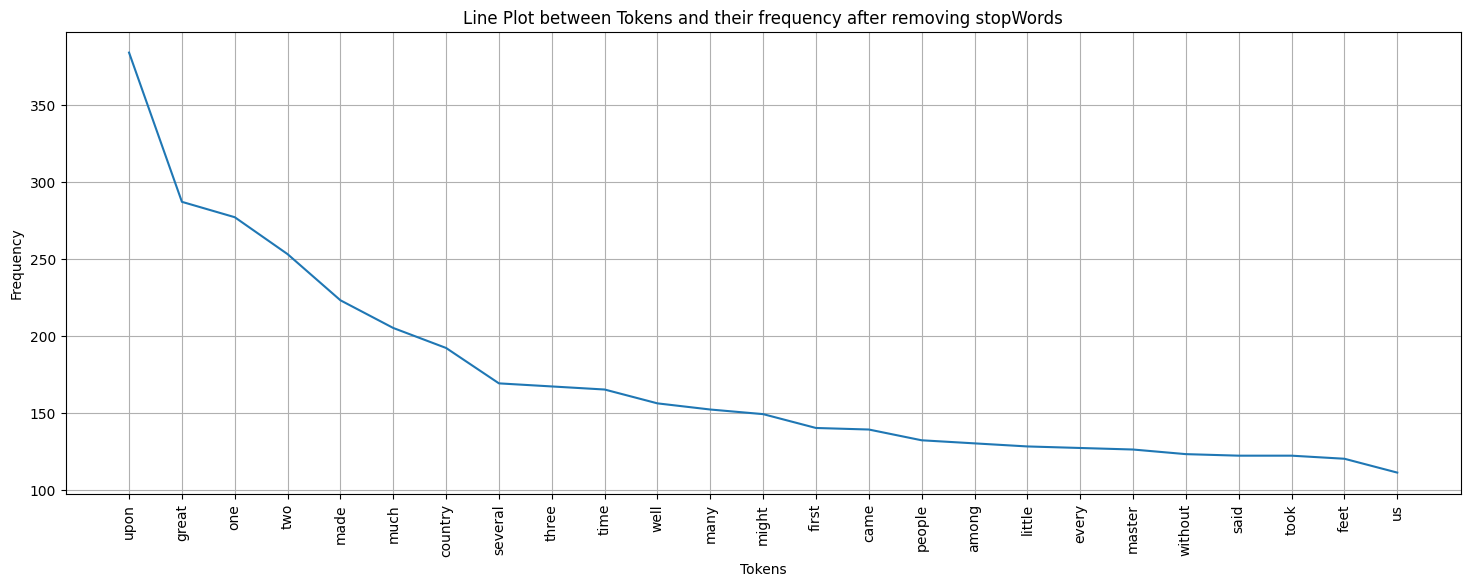

In [17]:
plt.figure(figsize=(18,6))
plt.title("Line Plot between Tokens and their frequency after removing stopWords")
plt.plot(df_a['Tokens'].iloc[:25],df_a['Frequency'].iloc[:25])
plt.xticks(rotation=90)
plt.xlabel("Tokens")
plt.ylabel("Frequency")
plt.grid()
plt.show()

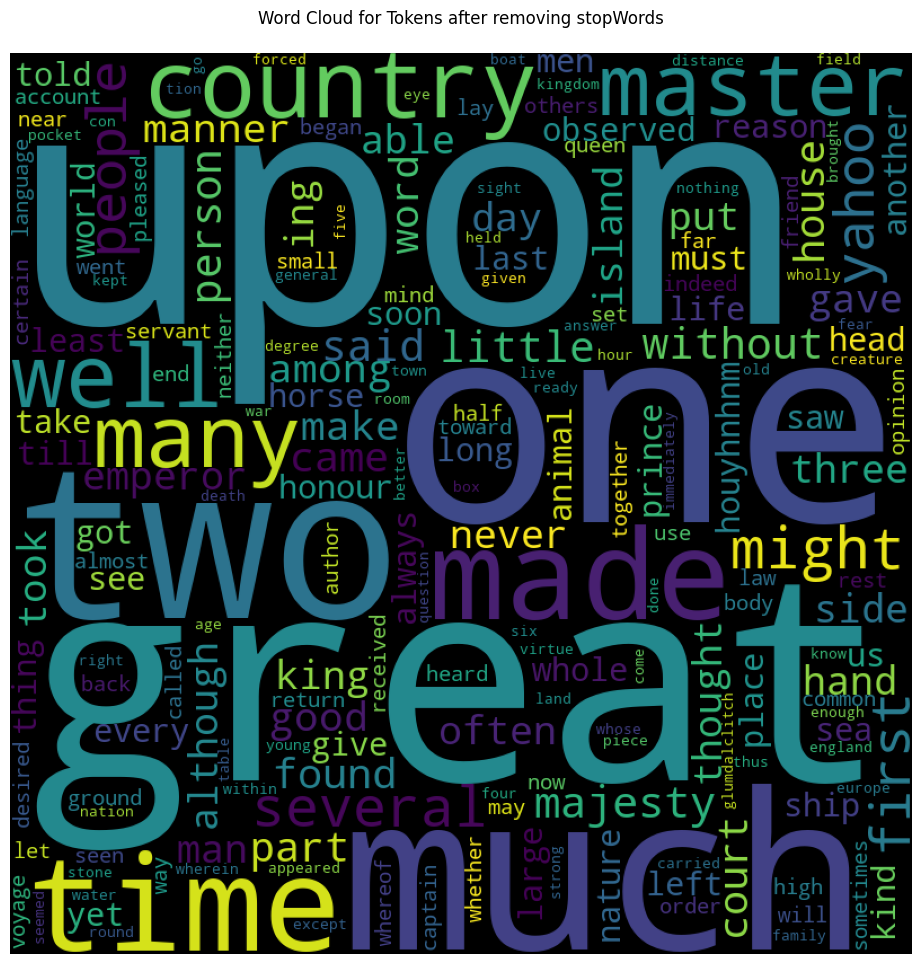

In [18]:
#Creating WordCloud after Removing StopWords
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black', stopwords={},
                min_font_size = 5).generate(stop_words_removed_txt)

plt.figure(figsize = (10, 10), facecolor = None)
plt.title("Word Cloud for Tokens after removing stopWords\n")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 2)

plt.show()

In [19]:
#Performing POS Tagging using Penn Treebank Tagset
tagged = nltk.pos_tag(tokens_with_stopword)
tagged[:50]

[('to', 'TO'),
 ('lilliput', 'VB'),
 ('the', 'DT'),
 ('author', 'NN'),
 ('gives', 'VBZ'),
 ('some', 'DT'),
 ('account', 'NN'),
 ('of', 'IN'),
 ('himself', 'PRP'),
 ('and', 'CC'),
 ('family', 'NN'),
 ('his', 'PRP$'),
 ('first', 'JJ'),
 ('inducements', 'NNS'),
 ('to', 'TO'),
 ('travel', 'VB'),
 ('he', 'PRP'),
 ('is', 'VBZ'),
 ('shipwrecked', 'VBN'),
 ('and', 'CC'),
 ('swims', 'NNS'),
 ('for', 'IN'),
 ('his', 'PRP$'),
 ('life', 'NN'),
 ('gets', 'VBZ'),
 ('safe', 'JJ'),
 ('on', 'IN'),
 ('shore', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('country', 'NN'),
 ('of', 'IN'),
 ('lilliput', 'NN'),
 ('is', 'VBZ'),
 ('made', 'VBN'),
 ('prisoner', 'NN'),
 ('and', 'CC'),
 ('carried', 'VBD'),
 ('up', 'IN'),
 ('the', 'DT'),
 ('country', 'NN'),
 ('my', 'PRP$'),
 ('father', 'NN'),
 ('had', 'VBD'),
 ('small', 'JJ'),
 ('estate', 'NN'),
 ('in', 'IN'),
 ('nottinghamshire', 'NN'),
 ('was', 'VBD'),
 ('the', 'DT')]

In [20]:
dic_tag = dict(nltk.FreqDist([tag for (word,tag) in tagged]))
tag_df = pd.DataFrame(list(dic_tag.items()))
tag_df.rename(columns = {0:'Tags', 1:'Frequency'}, inplace = True)
tag_df = tag_df.sort_values('Frequency',ascending=False)
tag_df

,Tags,Frequency
3,NN,16187
5,IN,14713
2,DT,8715
9,JJ,7574
10,NNS,5995
12,VBD,5893
15,RB,5029
6,PRP,4913
7,CC,4858
1,VB,4418


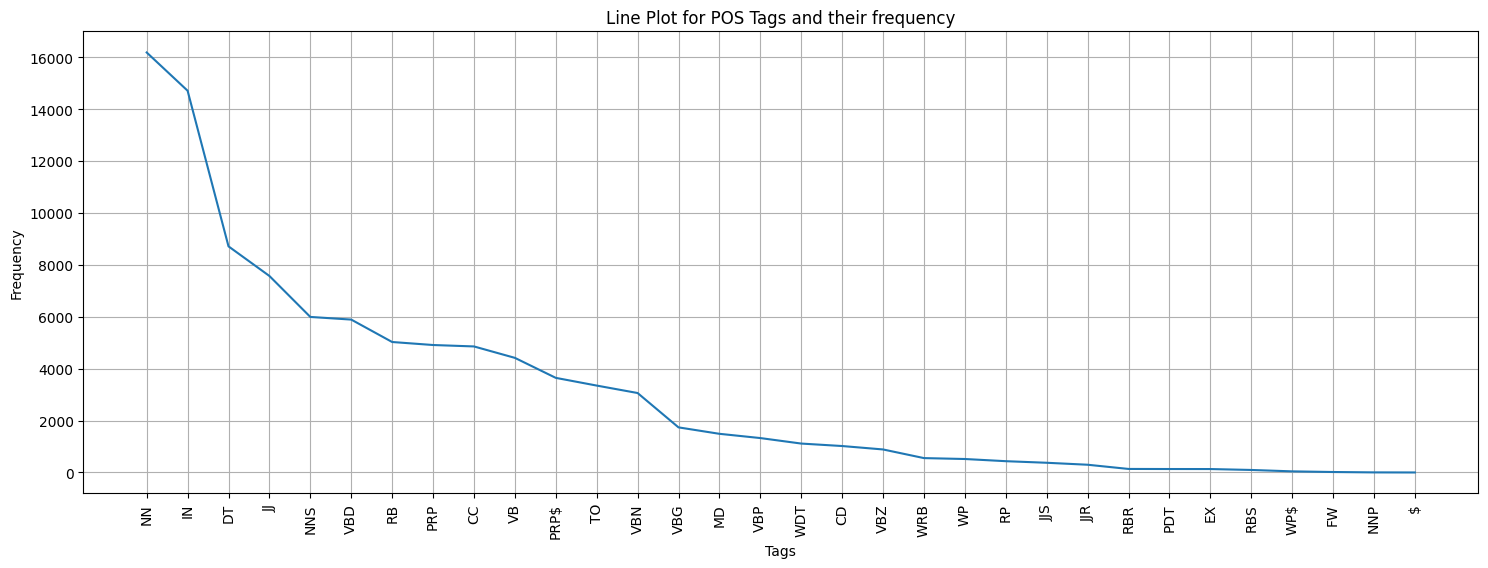

In [21]:
plt.figure(figsize=(18,6))
plt.title("Line Plot for POS Tags and their frequency")
plt.plot(tag_df['Tags'],tag_df['Frequency'])
plt.xticks(rotation=90)
plt.xlabel("Tags")
plt.ylabel("Frequency")
plt.grid()
plt.show()

In [22]:
new_list = word_list
biggest_chapter = new_list[2286:2736]
test_chapter = new_list[0:372]

In [23]:
#Converting biggest chapter to the text by joining them
biggest_txt = ""
biggest_txt = biggest_txt.join(biggest_chapter)
#converting test chapter to text by joining them
test_txt = ""
test_txt = test_txt.join(test_chapter)

In [24]:
biggest1_txt = biggest_txt.lower()
biggest1_txt = re.sub("(\n)|(\s)+"," ",biggest1_txt)
new_punct = {'!','?',',',';','-'}
new_punct_pattern = re.compile("[" + re.escape("".join(new_punct)) + "]")
biggest1_txt = re.sub(new_punct_pattern, " ", biggest1_txt)
biggest1_txt = re.sub("(\s)+"," ",biggest1_txt)
test1_txt = test_txt.lower()
test1_txt = re.sub("(\n)|(\s)+"," ",test1_txt)
test1_txt = re.sub(new_punct_pattern, " ", test1_txt)
test1_txt = re.sub("(\s)+"," ",test1_txt)
biggest1_txt[:400]

'ish. my son johnny named so after his uncle was at the grammar school and a towardly child. my daughter betty (who is now well married and has children) was then at her needle work. i took leave of my wife and boy and girl with tears on both sides and went on board the adventure a merchant ship of three hundred tons bound for surat captain john nicholas of liverpool commander. but my account of th'

In [25]:
biggest = word_tokenize(biggest1_txt)


In [26]:
unigram_counts = Counter(biggest)
bi_gram_counts = Counter(zip(biggest, biggest[1:]))

# Calculate the probability of each bi-gram
bi_gram_probabilities = {bi_gram: bi_gram_counts[bi_gram] / unigram_counts[bi_gram[0]] for bi_gram in bi_gram_counts}

#printing the bigram probability table
dl = pd.DataFrame(list(bi_gram_probabilities.items()), columns=['Bigram','Probability'])
dl

,Bigram,Probability
0,"(ish, .)",1.000000
1,"(., my)",0.021277
2,"(my, son)",0.011765
3,"(son, johnny)",0.333333
4,"(johnny, named)",1.000000
...,...,...
3924,"(philosopher, to)",1.000000
3925,"(to, enlarge)",0.006410
3926,"(enlarge, his)",1.000000
3927,"(his, thoughts)",0.020833


In [27]:
def fill_in_the_blanks(bi_gram_probabilities, input_string):
    words = input_string.split()
    filled_words = []

    for word in words:
        if word == '_':  # A blank to fill
            previous_word = filled_words[-1] if filled_words else 'this'  # Use 'this' as a fallback
            next_word_candidates = [bi_gram[1] for bi_gram in bi_gram_probabilities if bi_gram[0] == previous_word]
            if next_word_candidates:
                chosen_word = random.choices(next_word_candidates, [bi_gram_probabilities[(previous_word, w)] for w in next_word_candidates])[0]
            else:
                chosen_word = "_"  # If no candidates found, keep the blank
            filled_words.append(chosen_word)
        else:
            filled_words.append(word)

    return ' '.join(filled_words)


In [28]:
def select_random_5_word_string(sentence):
    # Tokenize the input sentence into words
    words = nltk.word_tokenize(sentence)

    # Ensure that there are at least 5 words in the sentence
    if len(words) < 5:
        return "Not enough words in the input sentence."

    # Generate a random starting index to select a 5-word string
    start_index = random.randint(0, len(words) - 5)

    # Select a 5-word string from the sentence
    selected_string = ' '.join(words[start_index:start_index + 5])

    return selected_string


In [29]:
#computing accuracy and playing shannon game
count=0
for i in range(200):
    input_string= select_random_5_word_string(test_txt)
    input_string = input_string.split()
    temp=input_string[1]
    input_string[1] = "_"
    input_string_2 = ' '.join(input_string)
    input_string[1]=temp
    input_string = ' '.join(input_string)
    result_string= fill_in_the_blanks(bi_gram_probabilities, input_string_2)
    if input_string == result_string:
      count=count+1
accuracy= (count/200)*100
print("the accuracy of Shannon game is: ")
accuracy

the accuracy of Shannon game is: 


4.5